In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [2]:
income_df = pd.read_csv("census-income1.csv")
income_df.head()

,age,workclass,fnlwgt,education,education-num,maarital-status,occupation,relationship,race,sex,hours-per-week,native-country,c15
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [3]:
income_df.describe()

,age,fnlwgt,education-num,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456
std,13.640433,1.055500e+05,2.572720,12.347429
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


In [4]:
income_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
maarital-status    0
occupation         0
relationship       0
race               0
sex                0
hours-per-week     0
native-country     0
c15                0
dtype: int64

In [5]:
income_df.age = income_df.age.astype(float)
income_df['hours-per-week'] = income_df['hours-per-week'].astype(float)

In [6]:
my_df = income_df.dropna()

In [7]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 13 columns):
age                32561 non-null float64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
education-num      32561 non-null int64
maarital-status    32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
hours-per-week     32561 non-null float64
native-country     32561 non-null object
c15                32561 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 3.5+ MB


In [8]:
my_df['predclass'] = my_df['c15']
del my_df['c15']
my_df['education-num'] = my_df['education-num']
del my_df['education-num']

In [9]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 12 columns):
age                32561 non-null float64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
maarital-status    32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
hours-per-week     32561 non-null float64
native-country     32561 non-null object
predclass          32561 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 3.2+ MB


In [10]:
print('workclass',my_df.workclass.unique())
print('education',my_df.education.unique())
print('marital-status',my_df['maarital-status'].unique())
print('occupation',my_df.occupation.unique())
print('relationship',my_df.relationship.unique())
print('race',my_df.race.unique())
print('sex',my_df.sex.unique())
print('native-country',my_df['native-country'].unique())
print('predclass',my_df.predclass.unique())

workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' 5th-6th'
 ' Prof-school' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
relationship [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' ' India' 

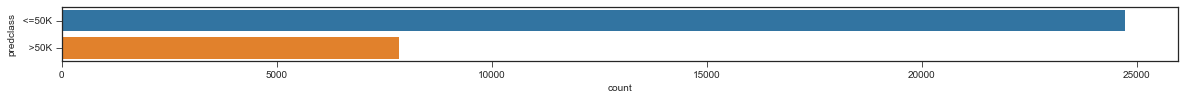

In [11]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df)

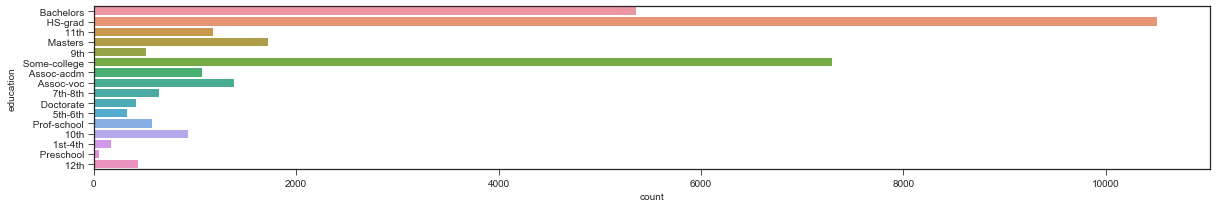

In [12]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df)

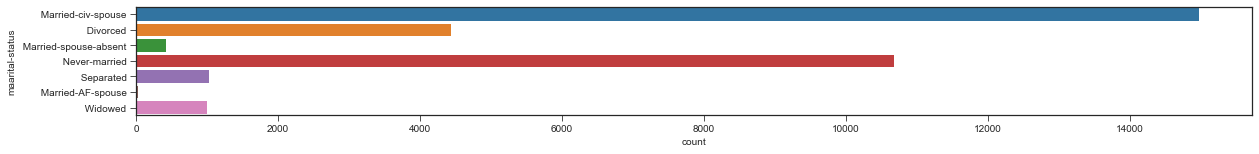

In [13]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="maarital-status", data=my_df)

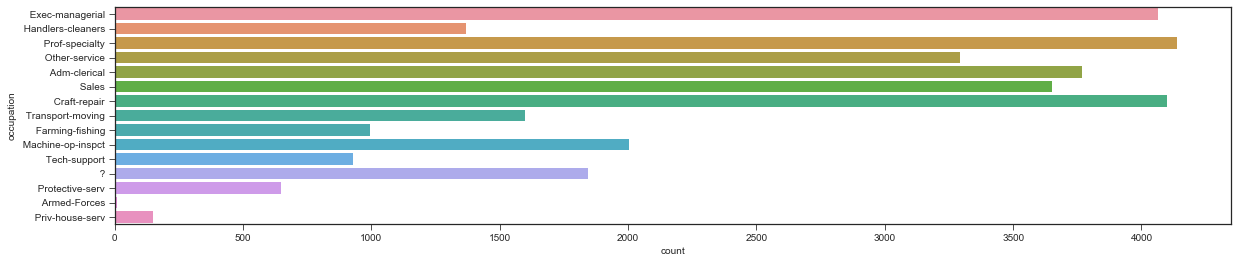

In [14]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df)

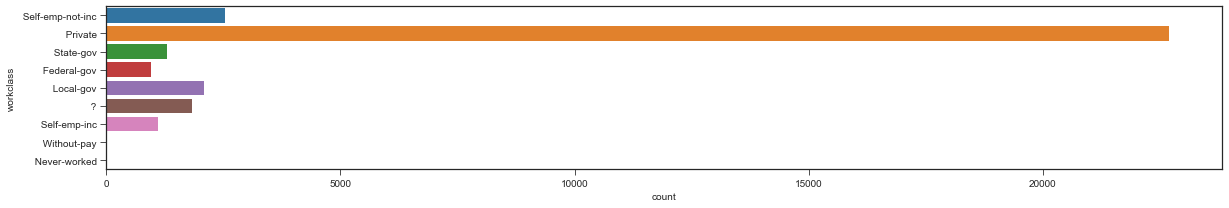

In [15]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df)

In [16]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,44.249841
0,<=50K,36.783738


<Figure size 1440x360 with 0 Axes>

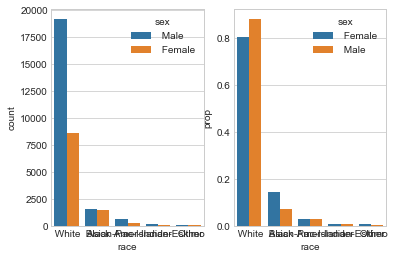

In [17]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(20, 60)

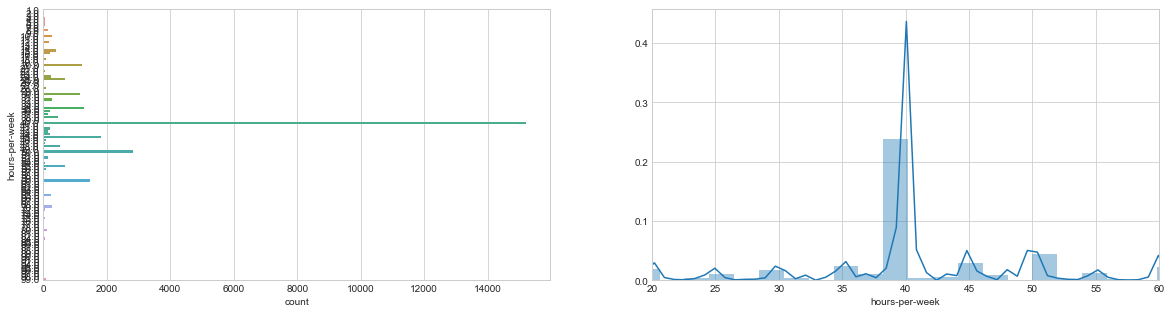

In [18]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hours-per-week']);
sns.distplot(my_df[my_df['predclass'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


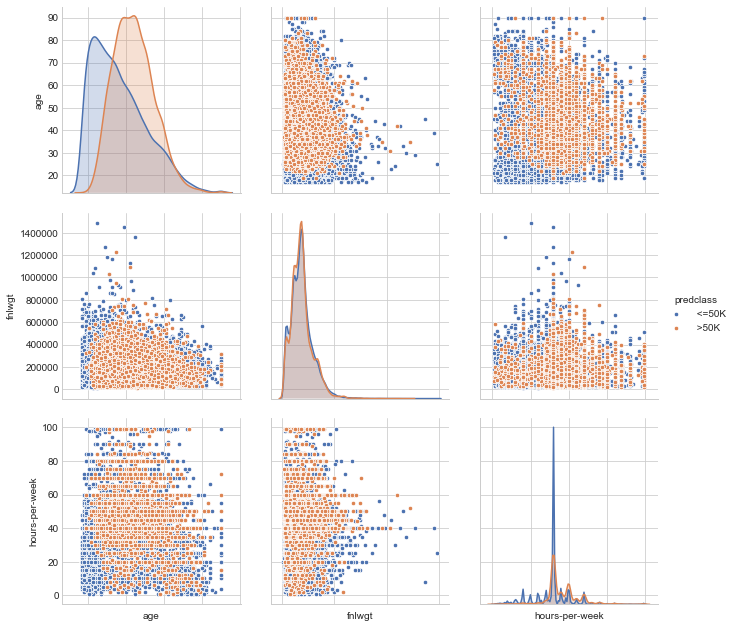

In [19]:
pp = sns.pairplot(my_df, hue = 'predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

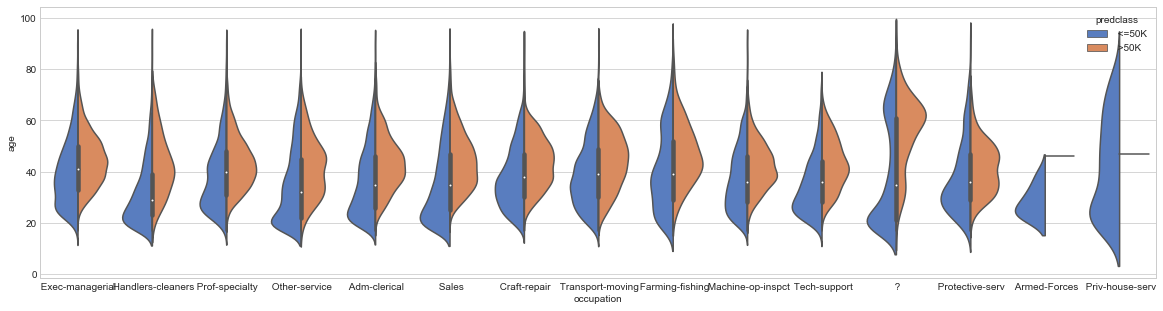

In [20]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

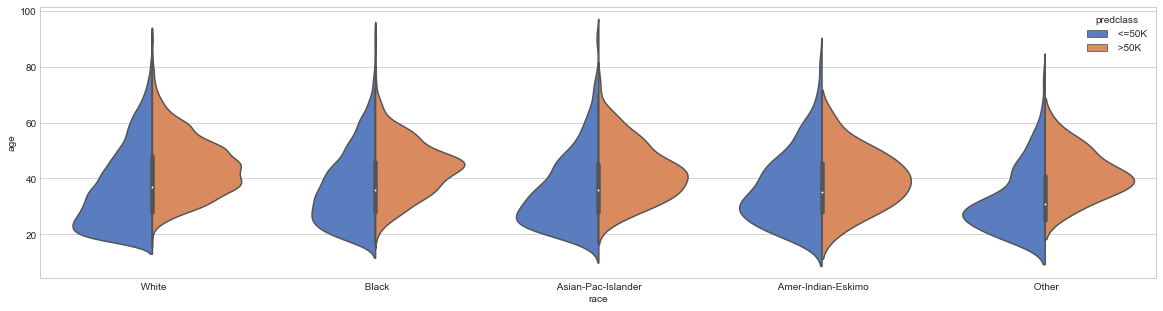

In [21]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

In [22]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [23]:
drop_elements = ['education', 'native-country', 'predclass', 'age', 'hours-per-week']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X.head()

,workclass,fnlwgt,maarital-status,occupation,relationship,race,sex
0,Self-emp-not-inc,83311,Married-civ-spouse,Exec-managerial,Husband,White,Male
1,Private,215646,Divorced,Handlers-cleaners,Not-in-family,White,Male
2,Private,234721,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
3,Private,338409,Married-civ-spouse,Prof-specialty,Wife,Black,Female
4,Private,284582,Married-civ-spouse,Exec-managerial,Wife,White,Female


In [24]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,fnlwgt,education,maarital-status,occupation,relationship,race,sex,hours-per-week,native-country,predclass
0,33,6,2926,9,2,4,0,4,1,12,39,0
1,21,4,14086,11,0,6,1,4,1,39,39,0
2,36,4,15336,1,2,6,0,2,1,39,39,0
3,11,4,19355,9,2,10,5,2,0,39,5,0
4,20,4,17700,12,2,4,5,4,0,39,39,0


In [25]:
drop_elements = ['education', 'native-country', 'predclass', 'age', 'relationship','hours-per-week']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)
X.head()

,workclass,fnlwgt,maarital-status,occupation,race,sex
0,6,2926,2,4,4,1
1,4,14086,0,6,4,1
2,4,15336,2,6,2,1
3,4,19355,2,10,2,0
4,4,17700,2,4,4,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [27]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

In [ ]:
#SVM
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

In [ ]:
#logisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

In [ ]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)